In [2]:
import pandas as pd

In [9]:
df2 = pd.read_csv('datos/daily-total-female-births-CA.csv',header =0,parse_dates=[0])

In [10]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [11]:
## Time Series - Data visualization

In [12]:
from matplotlib import pyplot as plt

In [13]:
Dataviz = df2.copy()

In [14]:
Dataviz.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


<AxesSubplot:>

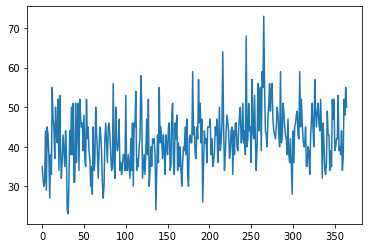

In [16]:
Dataviz['births'].plot()

In [19]:
Dataviz.index = Dataviz['date']

<AxesSubplot:xlabel='date'>

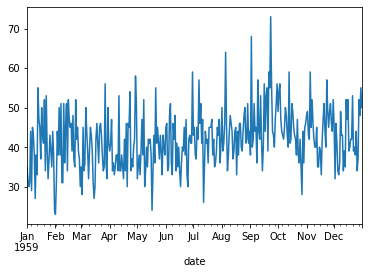

In [20]:
Dataviz['births'].plot()

In [21]:
Dataviz.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


In [26]:
Dataviz2 = Dataviz[(Dataviz['date']>'1959-01-01') & (Dataviz['date']<='1959-01-10')].copy()

<AxesSubplot:xlabel='date'>

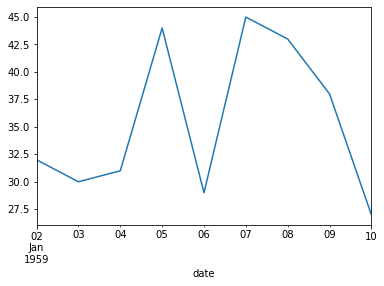

In [27]:
Dataviz2['births'].plot()

In [28]:
##Trendline

In [30]:
import seaborn as sns

<AxesSubplot:ylabel='births'>

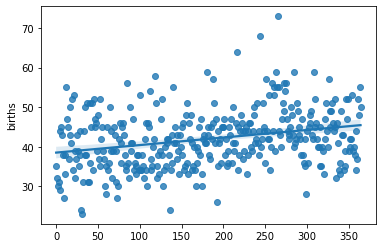

In [32]:
sns.regplot(x=df2.index.values,y=df2['births'])

<AxesSubplot:ylabel='births'>

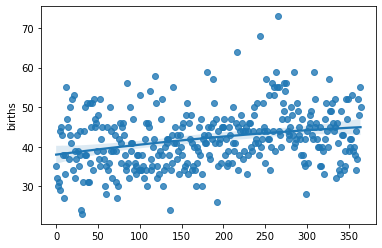

In [33]:
sns.regplot(x=df2.index.values,y=df2['births'],order=2)

In [36]:
miles_df = pd.read_csv('datos/us-airlines-monthly-aircraft-miles-flown.csv',header =0, parse_dates=[0])

In [37]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

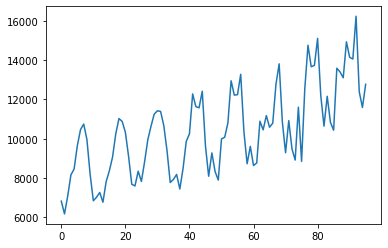

In [38]:
miles_df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

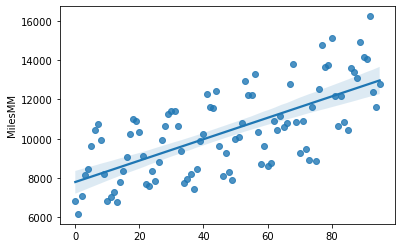

In [39]:
sns.regplot(x=miles_df.index.values,y=miles_df['MilesMM'])

In [40]:
## REmoving seasonality

In [41]:
miles_df['year'] = miles_df['Month'].dt.year

In [42]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [43]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

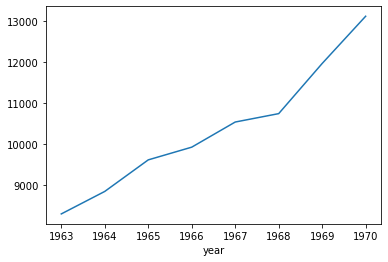

In [44]:
miles_df.groupby('year')['MilesMM'].mean().plot()

In [45]:
## Creating forecasting = Creating Lag plots

In [46]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


In [47]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

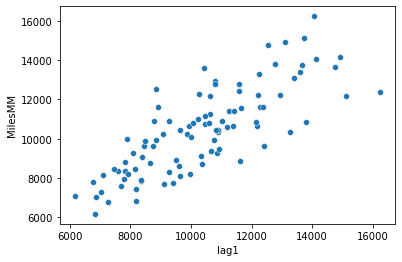

In [48]:
sns.scatterplot(x=miles_df['lag1'],y=miles_df['MilesMM'])

In [49]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

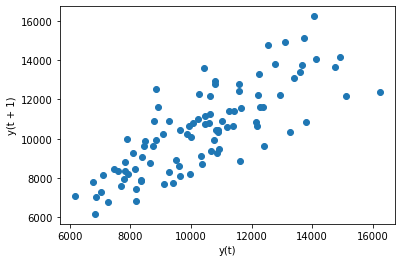

In [50]:
lag_plot(miles_df['MilesMM'])

In [51]:
## Autocorrelation plots

In [52]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

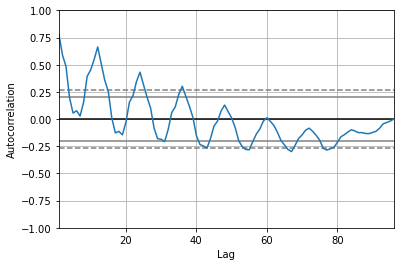

In [53]:
autocorrelation_plot(miles_df['MilesMM'])